In [1]:
%load_ext autoreload
%autoreload 2

%cd ..

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *
from tools.preprocess import *
from tools.dayanalysis import *
from analysis.line2 import *
from analysis.modelexpt import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *

/data1/code/python/drawmonkey
NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [4]:
from analysis.probedatTaskmodel import *


In [2]:
# 1) Load data across days


animal = "Red"
expt = "lines5"
FD, MD = loadMultDataForExpt(expt, animal, whichdates="all", metadatonly=False)
PROBEDAT = loadProbeDatWrapper(FD, MD, getnumstrokes=True)

This is metadat:
{'sdate': 200921, 'edate': 201001, 'strokmodel_kind': 'spatial', 'strokmodel_tstamp': '201006_032853_lines5', 'datecategories': {'200921': 1, '200922': 1, '200923': 1, '200924': 1, '200925': 2, '200926': 2, '200927': 2, '200928': 2, '200929': 2, '200930': 2, '201001': 2}, 'dates_for_summary': ['200923', '200924', '200929', '200930', '201001'], 'matchedstrokes': None, 'task_train_test': {'probe1_liketrain': 'train', 'probe1_nostrokeconstraint': 'train', 'probe2_liketrain': 'train', 'probe2_nostrokeconstraint': 'train', 'probe3_hdpos': 'test', 'probe1': 'train', 'probe2': 'train', 'probe3': 'test', 'probe4': 'test', 'train': 'train'}, 'expt': 'lines5', 'exptnames': ['lines5']}

Getting these dates:
['200921', '200922', '200923', '200924', '200925', '200926', '200927', '200928', '200929', '200930', '201001']
Red 200921 lines5 0
- No h5 file for Red, 200921, lines5, 0 - returning None!
Red 200921 lines5 1
-- loaded presaved data: /data2/animals/Red/200921/200921_135553_lin

-- loaded presaved data: /data2/animals/Red/200930/200930_151129_lines5_Red_1.pkl
got 876 total trials
NO TASKSETS FOUND!! (is ok as long as this is desired)
NO TASKSETS FOUND!! (is ok as long as this is desired)
appending fd for sess 1
Red 200930 lines5 2
- No h5 file for Red, 200930, lines5, 2 - returning None!
Red 200930 lines5 3
- No h5 file for Red, 200930, lines5, 3 - returning None!
Red 200930 lines5 4
- No h5 file for Red, 200930, lines5, 4 - returning None!
Red 200930 lines5 5
- No h5 file for Red, 200930, lines5, 5 - returning None!
Red 200930 lines5 6
- No h5 file for Red, 200930, lines5, 6 - returning None!
Red 200930 lines5 7
- No h5 file for Red, 200930, lines5, 7 - returning None!
Red 200930 lines5 8
- No h5 file for Red, 200930, lines5, 8 - returning None!
Red 200930 lines5 9
- No h5 file for Red, 200930, lines5, 9 - returning None!
Red 201001 lines5 0
- No h5 file for Red, 201001, lines5, 0 - returning None!
Red 201001 lines5 1
-- loaded presaved data: /data2/animals/R

In [ ]:
from analysis.probedatTaskmodel import *


In [ ]:
# 1) Prepare data (filtering dates)
Probedat = ProbedatTaskmodel(PROBEDAT, MD)
filtdict = {
    "date":["200930", "201001"]}
Probedat.filterProbedat(filtdict);
strokes, tasks = Probedat.pd2strokes(Probedat.Probedat)
print("num trials")
print(len(tasks))

In [ ]:
# Standard model, without motor efficiency cost
params_data, params_model = Probedat.getParams()
Probedat.applyModel(params_data, params_model)
Probedat.Datamodel.plotPosteriorHist()

## === STANDARD APPLICATOIN OF MODEL (NOT USING MOTOR COST)

In [ ]:
# Apply motor costs
# 1) extract probedat anew
Probedat = ProbedatTaskmodel(PROBEDAT, MD)
filtdict = {
#     "date":["200930", "201001"]}
    "date":["200930"]}
Probedat.filterProbedat(filtdict);

# 2) apply mdoel
params_data, params_model = Probedat.getParams()
params_model["priorver"] = "uniform"
Probedat.applyModel(params_data, params_model)
Probedat.Datamodel.plotPosteriorHist()

### DEVELOPMENT

In [ ]:
# takes in behavior and task.
# outputs motor efficiency cost

pnum = 0 # which parse number?
p = Probedat.Datamodel.trials[0]["model_parses"][0]
# parse is what we want to score.
trial = Probedat.Datamodel.trials[0]
# trial includes task, so what will be scored against.

In [ ]:
from pythonlib.drawmodel.efficiencycost import Cost

a = lambda: np.random.rand()

MC = Cost()
MC.Params

In [ ]:
MC.score(p["strokes"], trial["task"])
MC.printPlotSummary(p["strokes"], trial["task"])

In [ ]:
# == Plot many random trials, check that athis makes sense
# vary by hand the params, test whether score chagnes as predicted based on the beahviro.

MC = Cost()

In [ ]:

a = -1
tnum = 2
pnum = 0 # which parse number?

params = {
    "screenHV":[1024, 768]
}
params["thetas"] = {
    "strokedir":(0, 0),
    "numstrokes":a,
    "startloc":(a, -100, 100),
    "endloc":(a,  100, -100.),
    "jumpdir":(a, 0)
}


MC.updateThetas(params)
# MC.initialize()
if True:
    strokes = Probedat.Datamodel.trials[tnum]["behavior"]["strokes"]
else:
    p =  Probedat.Datamodel.trials[tnum]["model_parses"][pnum]
    strokes = p["strokes"]

# parse is what we want to score.
trial = Probedat.Datamodel.trials[tnum]
# trial includes task, so what will be scored against.
MC.printPlotSummary(strokes, trial["task"])

# == 1) Plot
Probedat.Datamodel.plotExampleTrial(tnum)


## Putting it together - using motor cost model as prior fucntion

[parsing]
[standardizing strokes]
built and applied model (but did not optimize params)


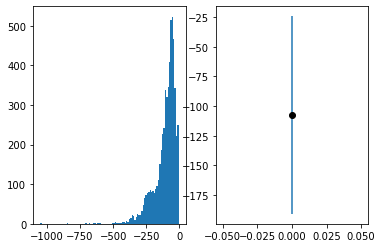

In [14]:
# 0) New MC model
from pythonlib.drawmodel.efficiencycost import Cost
MC = Cost()

# 1) extract probedat anew
Probedat = ProbedatTaskmodel(PROBEDAT, MD)
if False:
    filtdict = {
    #     "date":["200930", "201001"]}
        "date":["200928", "200929", "200930", "201001"]}
    Probedat.filterProbedat(filtdict);

# == define prior function based on MC model
def priorFunction(p, trial):
    return MC.score(p["strokes"], trial["task"])

# 2) apply mdoel
params_data, params_model = Probedat.getParams()
if False:
    params_model["priorver"] = priorFunction
params_data["standardize"]["standardize_strokes"] = True

Probedat.applyModel(params_data, params_model)
Probedat.Datamodel.plotPosteriorHist()

NOTE: the x and y lims are hacky, should change


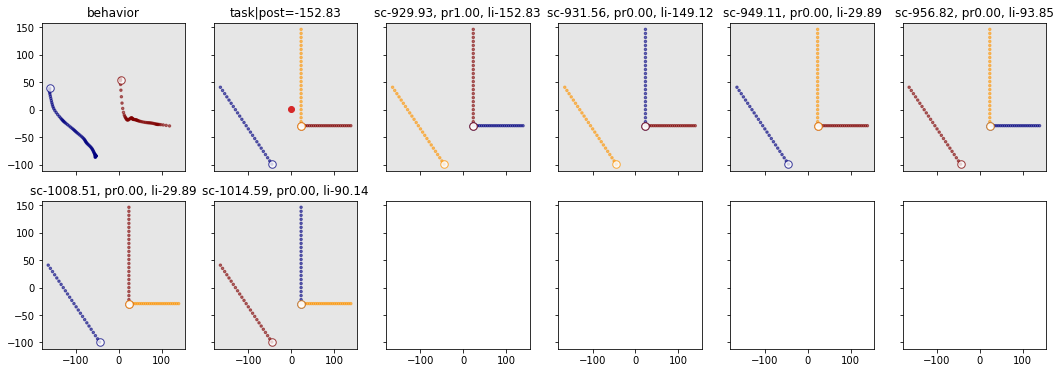

In [15]:
# === PLOT EXAMPLE TRIALS, SEE THAT PRIOR SCORE MATCHES EXPECTATIONS.
Probedat.Datamodel.plotExampleTrial(45, sort_by="prior")

# === RUN OPTIMIZATION


In [16]:
## FITTING, COST FUNCTION

def costfunc(params):
    
    mc_params = {}
#     mc_params["thetas"] = {
#     "strokedir":(0, 0),
#     "numstrokes":params[0],
#     "startloc":(params[1], -100, 100),
#     "endloc":(params[2],  100, -100.),
#     "jumpdir":(params[3], 0)
#     }

#     mc_params["thetas"] = {
#     "startloc":(params[0], -0, 0),
#     }

    mc_params["thetas"] = {
    "startloc":(params[0], params[1], params[2]),
    }

    # 1) update model params
    MC.updateThetas(mc_params)

    # 2) score all tasks with updated params
    def priorFunction(p, trial):
        return MC.score(p["strokes"], trial["task"])
    
    Probedat.Datamodel.model.priorFunction = makePriorFunction(ver=priorFunction)[0]
    Probedat.Datamodel.score(force_run = ["prior_score", "prior_probs", "getPosterior"])
    
    # 3) summarize as mean score
    mean_posterior = np.mean(Probedat.Datamodel.summarizeScore()["post_scores"])
    print(mean_posterior)
    
    return mean_posterior

params0 = (-1, 0, 0)
bounds = [[-10, 0], [-300, 300], [-300, 300]]

In [17]:
## RUN FITTING

from pythonlib.tools.modfittools import minimize    

# 1) Cost function
res = minimize(costfunc, params0, bounds=bounds)



-105.15941787992558
-105.15941787971936
-105.15941788016465
-105.15941788036238
-105.16237950289513
-105.16237950265497
-105.16237950313835
-105.1623795033393
-105.16558797207794
-105.16558797180191
-105.16558797232591
-105.16558797253032
-105.17972801469507
-105.17972801428307
-105.1797280149616
-105.17972801517935
-105.25478528958494
-105.25478528873816
-105.25478528992046
-105.2547852901841
-105.7465465590196
-105.7465465573927
-105.74654655957266
-105.746546559939
-108.64858361115166
-108.64858360990358
-108.64858361195402
-108.64858361225973
-108.95736827656745
-108.95736827557535
-108.95736827735418
-108.95736827760841
-108.97437080118773
-108.97437080019834
-108.97437080197246
-108.97437080222583
-109.04192628138803
-109.0419262804092
-109.0419262821647
-109.0419262824148
-109.30521351949425
-109.30521351855391
-109.30521352023963
-109.30521352047985
-110.26447926215978
-110.26447926131385
-110.26447926279141
-110.26447926302357
-114.72766382204684
-114.72766382117241
-114.72766

In [18]:
res

      fun: -120.96605325771421
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.16914113e-01, -4.26325303e-06, -3.47028797e-03])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 88
      nit: 13
     njev: 22
   status: 0
  success: True
        x: array([-10.        , 226.37107841, 300.        ])

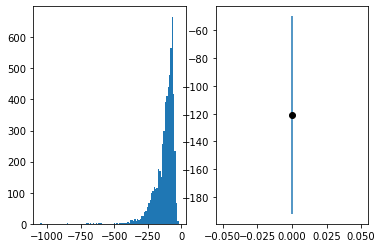

In [19]:
Probedat.Datamodel.plotPosteriorHist()

NOTE: the x and y lims are hacky, should change
Feature names:
['startloc']
Feature vector: 
[0.46876002680763007]
Feature thetas:
[-10.]
Score
-4.6876002680763005


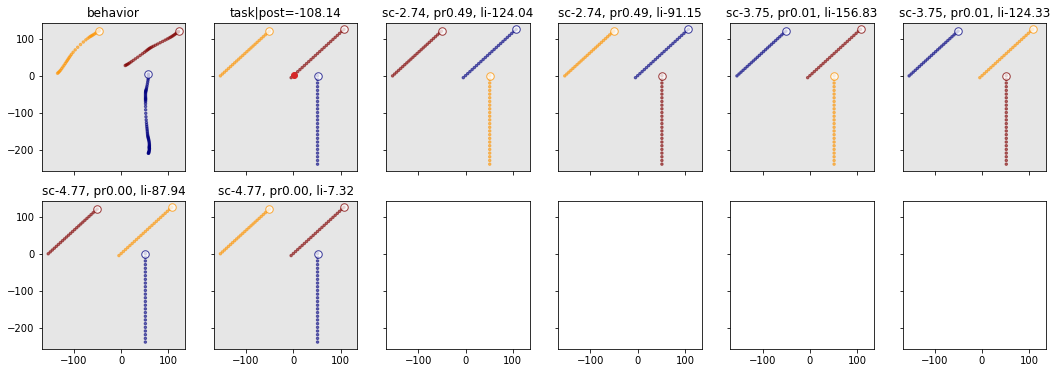

In [12]:
## After fitting, plot some trials probs, parses, and features
tnum = random.randint(0, 200)

Probedat.Datamodel.plotExampleTrial(tnum, sort_by="prior")

## Print feature values
strokes = Probedat.Datamodel.trials[tnum]["behavior"]["strokes"]
trial = Probedat.Datamodel.trials[tnum]
# trial includes task, so what will be scored against.
MC.printPlotSummary(strokes, trial["task"])


# === TO DO
1. include distance travelled.

2. plot a bunch of trials, vary each feature and make sure makes sense. (DONE)

3. integrate with Task model

4. optimize

5. onset location, make relative (e.g., top-left corner)

6. All task features for parses should using stroke centers, since stroke endpoints are arbitrary.
- OR: include both direction parses
- AND: switch to DTW or Frechet distance.

7. Plot emprical distribution of onset positions.

8. use gaussian distribution (see Lake).

9. (gaussian distribution method, should be positive control to make sure everything working.

10. Use bayesian model fitting.

11. Include model fitting for temporature param

12. [important] use negative posterior...



